An autonomous system number (ASN) is a unique number assigned to an autonomous system(AS) by the Internet Assigned Numbers Authority (IANA).

An AS consists of blocks of IP addresses which have a distinctly defined policy for accessing external networks and are administered by a single organization but may be made up of several operators.

IPs of Starlink User Terminals have the ASN of `14593`

Also see:
- https://www.peeringdb.com/net/18747
- https://www.measurementlab.net/data/


In [9]:
import pandas as pd
import matplotlib.pyplot as plt

## Table Entry Stats over Time

In [100]:
ndt5_df   = pd.read_csv("./mlab_starlink_data/ndt5_tableentrystats.csv").set_index("month")
ndt7_df   = pd.read_csv("./mlab_starlink_data/ndt7_tableentrystats.csv").set_index("month")
web100_df = pd.read_csv("./mlab_starlink_data/web100_tableentrystats.csv").set_index("month")

<AxesSubplot: xlabel='month'>

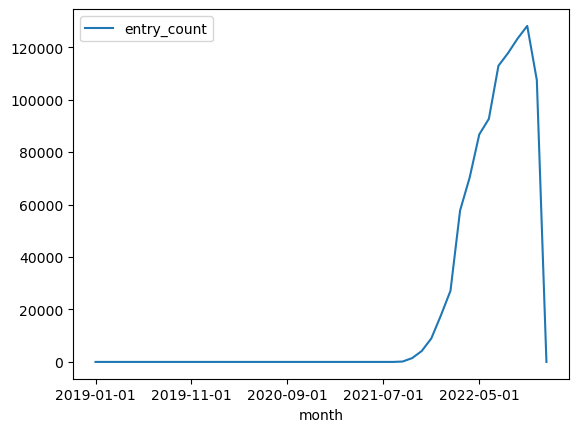

In [101]:
ndt5_df.plot()

<AxesSubplot: xlabel='month'>

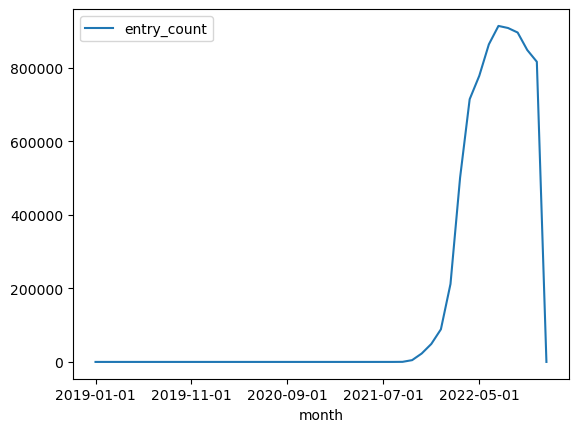

In [12]:
ndt7_df.plot()

## Country Entry Count

In [112]:
ndt7_df

,entry_count
CountryName,
Czechia,6401
Ireland,46158
Italy,34377
Slovakia,8
Puerto Rico,815
Germany,107396
France,36876
Mozambique,15
Greece,138


<AxesSubplot: ylabel='entry_count'>

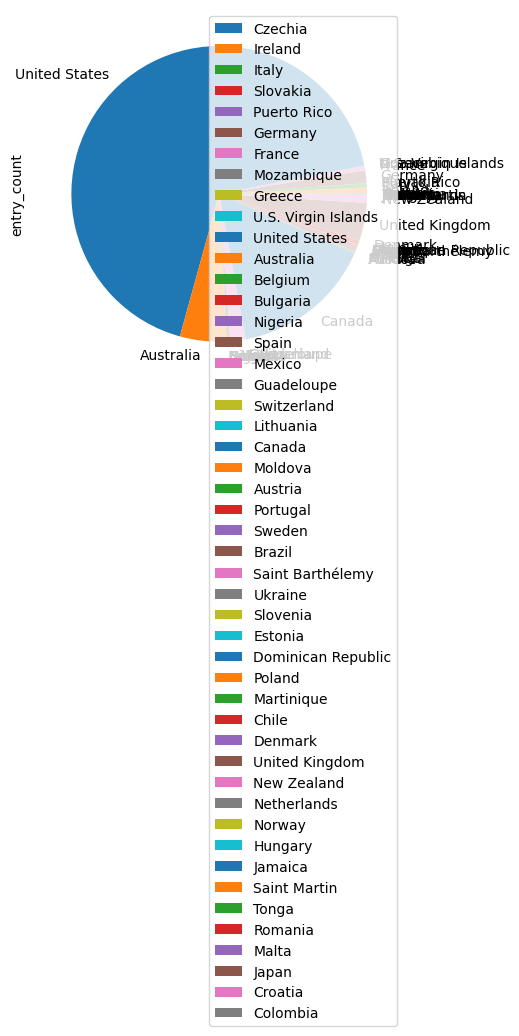

In [111]:
ndt7_df   = pd.read_csv("./mlab_starlink_data/ndt7_countryentrycount.csv").set_index("CountryName")
ndt7_df.plot(kind='pie', y='entry_count')

## Geohash 2 Diagnostic

In [3]:
import geohash
import pandas as pd

In [4]:
ndt7_df   = pd.read_csv("./mlab_starlink_data/ndt7_geohash2diagnostic.csv").set_index("geohash")
ndt7_df = ndt7_df.sort_values(by="count_measurements", ascending=False)
ndt7_df["lat-lon"] = ["({},{})".format(*geohash.decode(gh)) for gh in ndt7_df.index]

In [5]:
ndt7_df[:10]

,avg_minrtt,avg_meanthroughputmbps,avg_lossraate,count_measurements,lat-lon
geohash,,,,,
c23nb,329.591735,30.509303,0.020503,982695,"(47.61474609375,-122.32177734375)"
dp3wm,283.169694,29.347492,0.023387,908031,"(41.90185546875,-87.64892578125)"
dn5bt,300.738084,25.151222,0.024724,790489,"(33.85986328125,-84.48486328125)"
9vg4m,271.111393,25.551259,0.023675,777100,"(32.76123046875,-96.78955078125)"
9q5ct,332.111925,29.119967,0.020757,742543,"(34.03564453125,-118.23486328125)"
dr5ru,312.436704,30.936684,0.022009,565985,"(40.75927734375,-73.98193359375)"
dpz86,570.161989,34.437060,0.022960,434705,"(43.65966796875,-79.34326171875)"
r3gx2,556.498658,38.557762,0.021071,383881,"(-33.85986328125,151.19384765625)"
9xj64,203.797240,28.365216,0.022598,348034,"(39.74853515625,-105.00732421875)"


In [29]:
def get_sizes(df):
    tp_max = df["avg_meanthroughputmbps"].max()
    tp_min = df["avg_meanthroughputmbps"].min()
    sizes = [50*(np.exp(((tp - tp_min)/(tp_max - tp_min)) * 2 ) - 1) + 4 for tp in df["avg_meanthroughputmbps"]]
    return sizes

In [17]:
sizes

[70.21700796125343,
 69.36570071097968,
 66.29091965991046,
 66.58404388098606,
 69.19898367984477,
 70.53016742373144,
 73.09503832438676,
 76.11444690358314,
 68.64594659496032,
 79.88684511490528,
 72.83833829623933,
 73.86921988526146,
 64.9981312769163,
 72.4586062475137,
 70.12348385719717,
 79.64911491124306,
 74.64395424068385,
 77.18384414948957,
 81.78381972157604,
 79.24297448065559,
 83.67745793689843,
 70.99068799218506,
 80.78508481650778,
 77.11100400012228,
 86.22961863449831,
 67.99013890899367,
 67.01879790257337,
 83.40232293637996,
 77.17572846285671,
 77.91013897145294,
 67.82364262207315,
 77.60709412785661,
 80.93021905844098,
 57.74079845288555,
 78.37014442286531,
 92.44417309698667,
 69.15847009423322,
 73.61123847967693,
 70.92917901442718,
 91.97402994228761,
 72.70242472677418,
 87.99519640881067,
 61.66389177931826,
 63.4213158673012,
 54.052624086057335,
 69.0970847129792,
 66.98210875604357,
 73.86519267219632,
 69.37031149636057,
 67.9083661398304,
 67.

In [27]:
import matplotlib.pyplot as plt

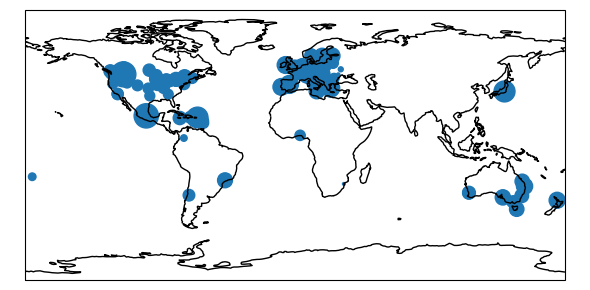

In [43]:
import geohash
import numpy as np
import cartopy.crs as ccrs

#ndt7_df = ndt7_df[:10]

points = [geohash.decode(gh) for gh in ndt7_df.index]
points = np.array(points)

sizes = get_sizes(ndt7_df)

def visualize_cords(points, sizes, show=True, ax=None, color="blue"):
    if(ax is None):
        fig, ax = plt.subplots(figsize=(6, 3))
        ax.axis("off")
        ax.yaxis.set_visible(False)
        ax.xaxis.set_visible(False)
        ax = plt.axes(projection=ccrs.PlateCarree())
        # xticks color white
        plt.xticks(color='w')

        # yticks color white
        plt.yticks(color='w')
        #ax.stock_img()
        ax.set_extent((-180, 180, -90, 90))
        ax.coastlines()
        #ax.axis("off")
        #ax.yaxis.set_visible(False)
    
    latitude, longitude = points[:, 1], points[:, 0]
    plt.scatter(latitude, longitude,
     s=sizes,
     transform=ccrs.PlateCarree(),
     )

    if(show):
        plt.tight_layout()
        plt.savefig("mlab_meanthroughput_starlink_map.pdf")
        plt.show()

visualize_cords(points, sizes)

# [x] Remove Colors
# [x] Look into dot on left side. Country of Tonga
# Seperate Plots:
  # CDF of 5 different continents (Asia, Europe, North America, South America, Africa, Oceania)
    # Meanthroughput in Mbps
    # MinRTT
    # Lossrate
# [x] Is Japan the only Asian country where Starlink is operating?
  # Yes, see https://www.starlink.com/map

## Analysis Idea

- Choose Countries with different Orbital Properties
    - 

- Plot throughput/latency for each continent/country/states
  - How do choose countries? Some countries with different relationships to the orbital planes (inclination or other parameters)
  
- Timewise Analysis (country/continent)
  - Throughput Latency change from 2021/2022
    - How does this relate to orbital shells?
  - Correlate to new launches?



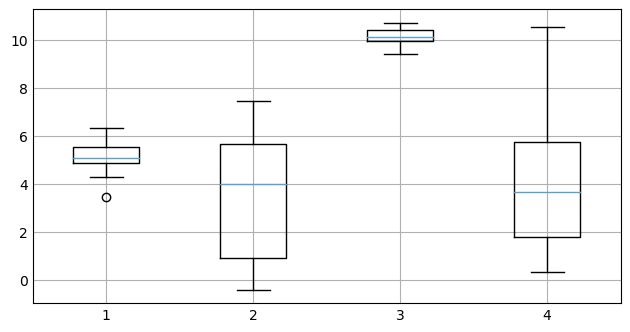

In [90]:
import matplotlib.pyplot as plt
import numpy as np

plt.style.use('_mpl-gallery')

# make data:
np.random.seed(10)
arr1 = np.random.normal(5, 1, size=(10,))
arr2 = np.random.normal(3, 3, size=(10,))
arr3 = np.random.normal(10, 0.3, size=(10,))
arr4 = np.random.normal(4, 5, size=(10,))

columns = [arr1, arr2, arr3, arr4]

fig, ax = plt.subplots(figsize=(6, 3))
ax.boxplot(columns)
plt.show()

In [45]:
df = pd.read_csv("./mlab_starlink_data/ndt7_city2fivenumbersummary.csv")
df = df.set_index("City")
df = df.loc[[
            "Mexico City",
            "Bogotá",
            "Oslo",
            "Seattle",
            "Sydney"
            ]]

In [46]:
df.columns

Index(['measurement_count', 'avg_latitude', 'avg_longitude',
       'MeanThroughputMbps_stddev', 'MinRTT_stddev', 'lossrate_stddev',
       'MeanThroughputMbps_q0', 'MeanThroughputMbps_q1',
       'MeanThroughputMbps_q2', 'MeanThroughputMbps_q3',
       'MeanThroughputMbps_q4', 'MinRTT_q0', 'MinRTT_q1', 'MinRTT_q2',
       'MinRTT_q3', 'MinRTT_q4', 'lossrate_q0', 'lossrate_q1', 'lossrate_q2',
       'lossrate_q3', 'lossrate_q4'],
      dtype='object')

In [54]:
def row2box(row, attr, usestd = True):
    median = row["{}_q2".format(attr)]
    
    if(usestd):
        q0 = median - row["{}_stddev".format(attr)]
        q4 = median + row["{}_stddev".format(attr)]
    else:
        q0 = row["{}_q0".format(attr)]
        q4 = row["{}_q4".format(attr)]
    
    return {
        'label' : row.name,
        'whislo': q0,# Bottom whisker position
        'q1'    : row["{}_q1".format(attr)],             # First quartile (25th percentile)
        'med'   : median,                                # Median         (50th percentile)
        'q3'    : row["{}_q3".format(attr)],             # Third quartile (75th percentile)
        'whishi': q4,    # Top whisker position
        'fliers': []                                     # Outliers
    }

def visualize_boxplot(df, attr, save=False):
    fig, ax = plt.subplots(figsize=(6, 3))
    boxes = [row2box(row, attr) for idx, row in df.iterrows()]
    ax.bxp(boxes, showfliers=False)
    
    if(attr == "MeanThroughputMbps"):
        ax.set_ylabel("Mean Throughput in Mbps")
    elif(attr == "MinRTT"):
        ax.set_ylabel("Min RTT in milliseconds")
    elif(attr == "lossrate"):
        ax.set_ylabel("Lossrate from the lifetime of the connection")
    
    if(save):
        plt.tight_layout()
        plt.savefig("mlab_{}_starlink_boxplot.pdf".format(attr))
    plt.show()
    
    
# Filter Edge-Cases:
    # MinRTT = -1
    # Meanthroughput = 0.0
    # lossrate = -1
# Inverstigate Max value, put those into outliers
    # Maximum values are probably better in a spearate plot
# TODO: Use Standard Deviation instead of Maximum/Minimum
    # https://github.com/tkdang97/Cloudy-with-a-Chance-of-Short-RTTs/blob/main/speedchecker-analysis.ipynb
    # Associated Dataset
        # Compare ISPs by looking at probes that connect to the same endpoint
            # Throughput, Latency/RTT
        # Use above information to compare the ISP to Starlink
# Compare this with throughput latencies reported over Cellular Networks


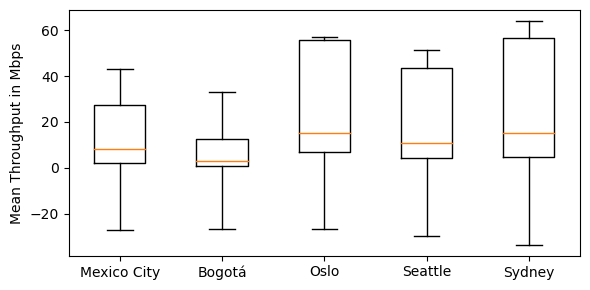

In [55]:
visualize_boxplot(df, "MeanThroughputMbps", save=True)

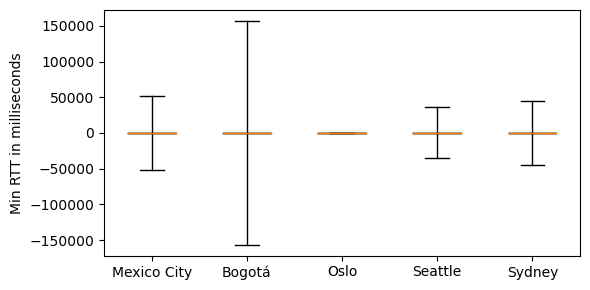

In [50]:
visualize_boxplot(df, "MinRTT", save=True)

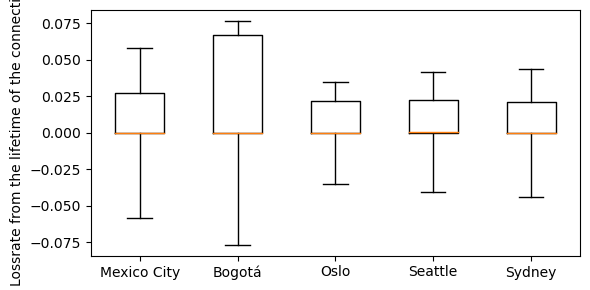

In [51]:
visualize_boxplot(df, "lossrate", save=True)

In [70]:
np.random.seed(10)
np.random.normal(5, 1, size=(10,))

array([6.3315865 , 5.71527897, 3.45459971, 4.99161615, 5.62133597,
       4.27991444, 5.26551159, 5.10854853, 5.00429143, 4.82539979])